# <div style="text-align: center; background-color: #FF0000; font-family:Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:20px">🖥 EDA on 2023 YouTube Statistics</div>

![image](https://static.vecteezy.com/system/resources/previews/003/206/623/original/youtube-editorial-app-icon-free-vector.jpg)

## <div style="text-align: left; background-color: #FF5252; font-family: Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:20px">🙇‍♀️ Goal of the Project<div>
The project is to analyze and visualize trends and tap into opportuties for billion-dollar success. I will mainly analyze the following criteria of the dataset: <br>
    <li> Earning 💵 </li>
    <li>Channel Type 🖥️ </li> 
    <li>Geogaphical Distribution 🗺️ </li>

<a id="1"></a>
# <div style="text-align: center; background-color: #FF4500; font-family: Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:20px">1. Loading necessary libraries and dataset</div>

In [44]:
## Remove Warnings ## 
import warnings
warnings.filterwarnings("ignore")

## Data ## 
import pandas as pd
import numpy as np

## Image Request ## 
import requests
from io import BytesIO

## Visualization ## 
import missingno as msno
from PIL import Image
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt  
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [45]:
df = pd.read_csv('C:\\Users\\sujee\\OneDrive\\Desktop\\projects\\gys\\Global YouTube Statistics.csv', encoding='latin1')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

There are <b>20</b> float types, <b>3</b> integer types, and <b>8</b> object types. 

In [47]:
df.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,...,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,...,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,...,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,...,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,...,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,...,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,...,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


<Axes: >

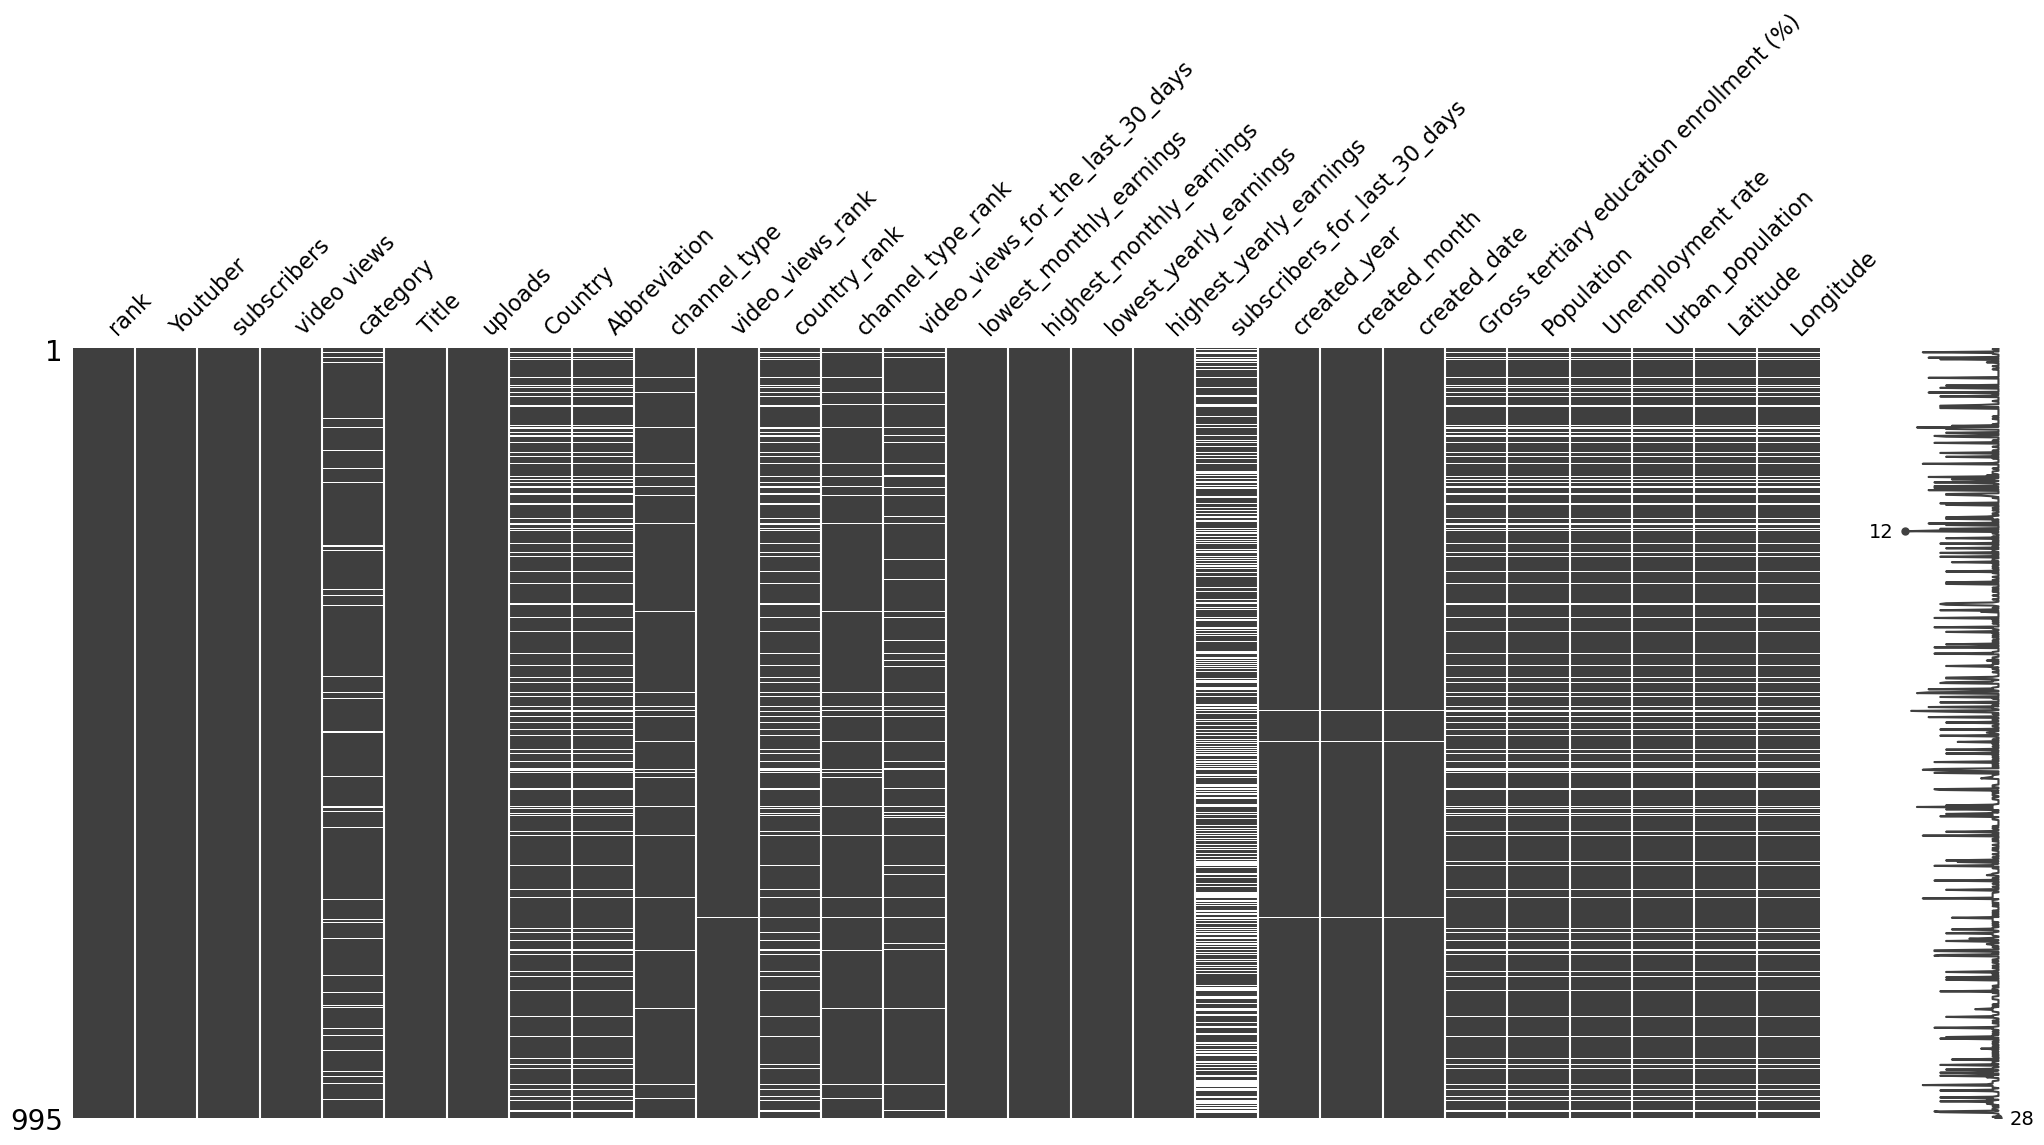

In [48]:
msno.matrix(df)

In [49]:
df['created_year'].min()

1970.0

As there are many <mark>missing values</mark>, I will remove the data with null values. Moreover, there is <mark>a wrong data value</mark>, which has created year equals to 1970 (YouTube was created in 2005, there is no way that the channel was created before that). 

In [50]:
df = df.dropna()
df.drop(df.loc[df['created_year'] == 1970].index, inplace=True)

In [51]:
color_scheme = px.colors.sequential.Reds

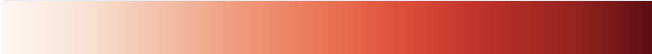

<a id="2"></a>
# <div style="text-align: center; background-color: #FF4500; font-family: Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:20px">2. Univariate Analysis </div>

<a id="2.1"></a>
##  <div style="text-align: left; background-color: #F75D59; font-family: Times New Roman; color: white; padding: 6px; line-height: 1;border-radius:10px">2.1. YouTube Channel Started Date Trend</div>

In [52]:
year_counts = df['created_year'].value_counts().sort_index()

fig = go.Figure() 

fig.add_trace(
    go.Scatter(
        x=year_counts.index,
        y=year_counts.values,
        fill='tozeroy',
        line_color='darkred',
        mode='lines+markers'
    )
)

fig.update_layout(
    title_text='YouTube Channels Created Year',
    template='plotly_white',
    xaxis=dict(
        title='Year',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Number of Channels',
        titlefont_size=16
    ),
)

fig.show()

YouTubers who have more than <mark>12 million subscribers</mark> created their YouTube in <b>2014</b>.

<a id="2.2"></a>
##  <div style="text-align: left; background-color: #F75D59; font-family: Times New Roman; color: white; padding: 6px; line-height: 1;border-radius:10px">2.2. Top 100 Most Subscribed YouTube Channel Names</div>

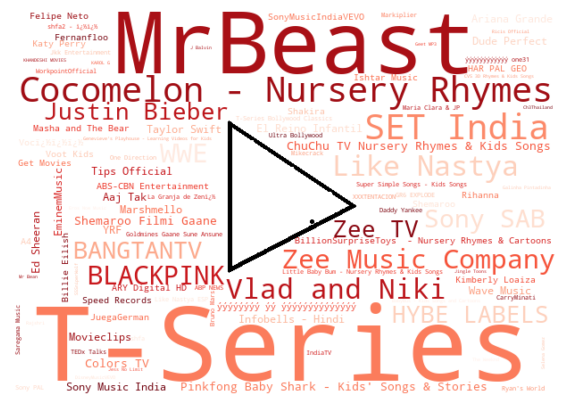

In [53]:
youtubers_data = dict(zip(df['Youtuber'].tolist(), df['subscribers'].tolist()))

plt.figure(figsize=(30,5))

response = requests.get('https://cached.imagescaler.hbpl.co.uk/resize/scaleWidth/952/cached.offlinehbpl.hbpl.co.uk/news/ORP/YouTube-icon-full_color-20150527090518393.png')
mask_image = np.array(Image.open(BytesIO(response.content)))

wc = WordCloud(width=800,
               height=500,
               max_words=100,
               mask=mask_image,
               colormap='Reds_r',
               contour_color='black',
               contour_width=3,
               background_color='white').generate_from_frequencies(youtubers_data)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [54]:
top10_most_subscribed_channels = df[:10]
fig = px.sunburst(
    top10_most_subscribed_channels,
    path=['Youtuber', 'Country'],
    values='subscribers',
    color='subscribers',
    color_continuous_scale='Reds'
)
fig.update_layout(
    title_text='Top 10 Most Subscribed YouTubers',
    uniformtext=dict(minsize=8, mode='hide'))
fig.show()

<mark>T-Series, Mr Beast, Cocomelon - Nursery Rhymes</mark> are top Youtubers who have most subscribers. 

<a id="2.3"></a>
##  <div style="text-align: left; background-color: #F75D59; font-family: Times New Roman; color: white; padding: 6px; line-height: 1;border-radius:10px">2.3. Video Views, Video Uploads and Subscribers </div>

In [56]:
fig = make_subplots(rows=1, cols=3)

fig.update_layout(title_text='Boxplot of Video Views & Video Uploads & Subscribers',
                  uniformtext_minsize=12,
                  uniformtext_mode='hide')

fig.add_trace(go.Box(y=df['video views'],
                     name='Video Views',
                     boxpoints='outliers',
                     marker_color=color_scheme[6],
                     line_color=color_scheme[3]), row=1, col=1)

fig.add_trace(go.Box(y=df['uploads'],
                     name='Video Uploads',
                     boxpoints='outliers',
                     marker_color=color_scheme[6],
                     line_color=color_scheme[4]), row=1, col=2)

fig.add_trace(go.Box(y=df['subscribers'],
                     name='Subscribers',
                     boxpoints='outliers',
                     marker_color=color_scheme[6],
                     line_color=color_scheme[5]), row=1, col=3)

fig.update_layout(
    template='plotly_white'
)

fig.show()

<a id="2.4"></a>
##  <div style="text-align: left; background-color: #F75D59; font-family: Times New Roman; color: white; padding: 6px; line-height: 1;border-radius:10px">2.4. Yearly Earning </div>

In [24]:
df['average_yearly_earnings'] = (df['lowest_yearly_earnings'] + df['highest_yearly_earnings']) / 2
df['average_monthly_earnings'] = (df['lowest_monthly_earnings'] + df['highest_monthly_earnings']) / 2

In [25]:
fig = px.histogram(df, x='average_yearly_earnings', marginal='box',
                   color_discrete_sequence=['darkred'])

fig.update_layout(
    title_text='YouTubers Yearly Earnings',
    template='plotly_white',
    xaxis=dict(
        title='Yearly Earnings',
        titlefont_size=16
    ),
    yaxis=dict(
        title='',
        titlefont_size=16
    ),
)
fig.update_traces(marker_line_color='black', 
                  marker_line_width=1, 
                  opacity=0.8)
fig.show()

YouTubers are mostly earning <b>1M-2.999M</b> dollars yearly. The most profitable youtuber earns <b>58.75M</b> yearly. 

<a id="2.4"></a>
##  <div style="text-align: left; background-color: #F75D59; font-family: Times New Roman; color: white; padding: 6px; line-height: 1;border-radius:10px">2.4. Channel Cateogry </div>

In [26]:
category = df['category'].value_counts().sort_values(ascending=True)

fig = px.pie(values=category.values, 
             names=category.index,
             color_discrete_sequence=color_scheme)

fig.update_traces(textposition='inside',
                  textfont_size=10,
                  textinfo='percent+label')

fig.update_layout(title_text="Category Pie Graph",
                  uniformtext_minsize=10, 
                  uniformtext_mode='hide',
                  template ='plotly_white')

fig.show()

<mark><b>Entertainment, Music, People and Blogs</b></mark> are top3 most used categories among profitable youtubers.

<a id="2.5"></a>
##  <div style="text-align: left; background-color: #F75D59; font-family: Times New Roman; color: white; padding: 6px; line-height: 1;border-radius:10px">2.5. Geographical Distribution </div>

In [27]:
country_counts = df['Country'].value_counts()[:10]
fig = go.Figure(go.Funnel(
    y=country_counts.index,
    x=country_counts.values, 
    textinfo='value',
    marker={'color': color_scheme}
))

fig.update_layout(
    title_text='Top 10 Country Distribution',
    template='plotly_white'
)
fig.show()

<mark><b>United States, India, Brazil</b></mark> are top3 countries where profitable youtubers are distributed.

<a id="3"></a>
# <div style="text-align: center; background-color: #FF4500; font-family: Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:20px">3. Earning Analysis </div>

<a id="3.1"></a>
##  <div style="text-align: left; background-color: #F75D59; font-family: Times New Roman; color: white; padding: 6px; line-height: 1;border-radius:10px">3.1. Video Views, Uploads, Subscribers vs Yearly Earnings </div>

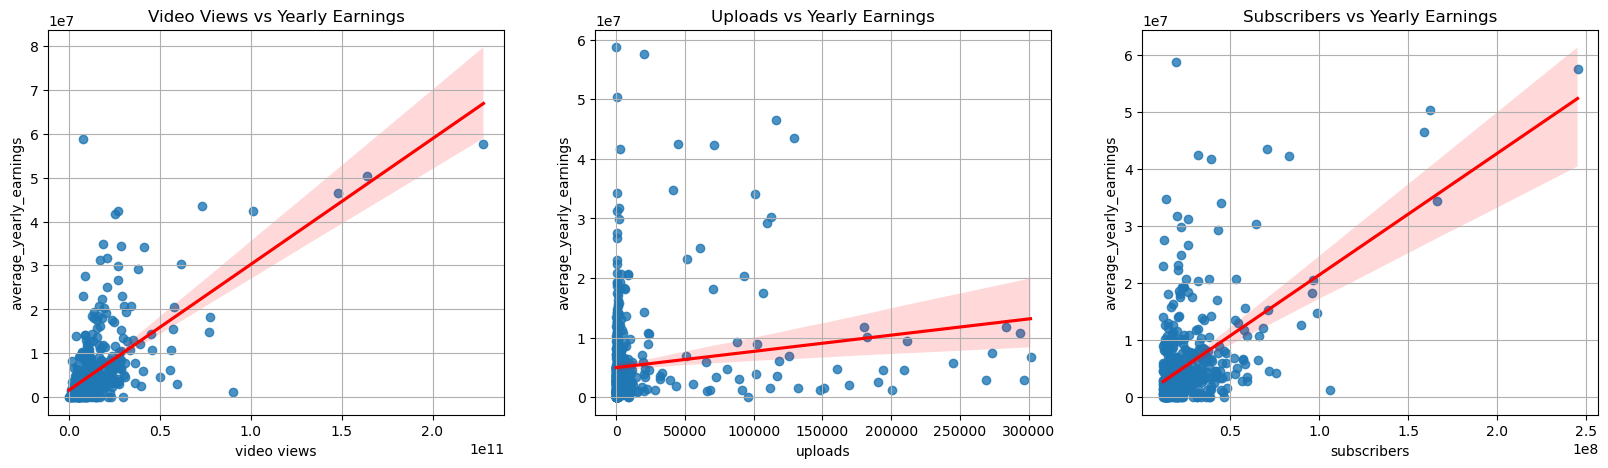

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))

sns.regplot(ax=axs[0], data=df, x='video views', y='average_yearly_earnings', line_kws={'color': 'red'})
sns.regplot(ax=axs[1], data=df, x='uploads', y='average_yearly_earnings', line_kws={'color': 'red'})
sns.regplot(ax=axs[2], data=df, x='subscribers', y='average_yearly_earnings', line_kws={'color': 'red'})

axs[0].grid(True)
axs[0].set_title('Video Views vs Yearly Earnings')
axs[1].grid(True)
axs[1].set_title('Uploads vs Yearly Earnings')
axs[2].grid(True)
axs[2].set_title('Subscribers vs Yearly Earnings')
plt.show()

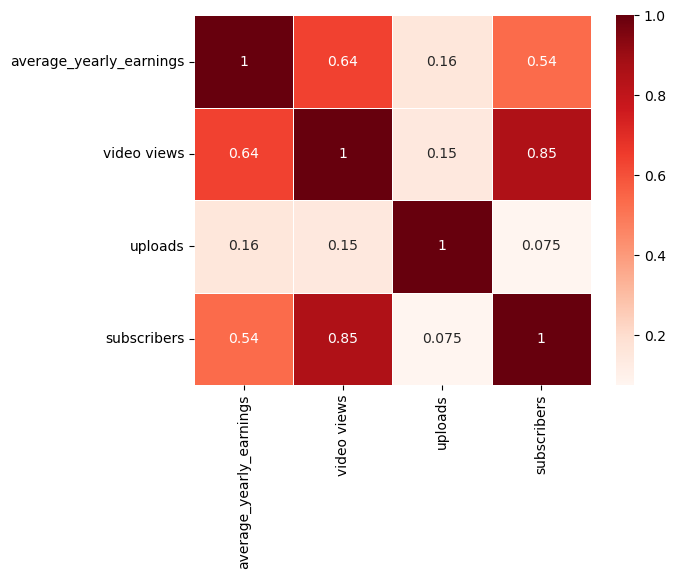

In [29]:
df_corr = df[['average_yearly_earnings', 'video views', 'uploads', 'subscribers']]
corr = df_corr.corr()
sns.heatmap(corr, annot=True, linewidth=0.5, cmap='Reds')
plt.show()

<mark>Video views</mark> are highly correlated with yearly earnings, and video views have high positive correlation with <mark>subscribers</mark>.

<a id="3.2"></a>
##  <div style="text-align: left; background-color: #F75D59; font-family: Times New Roman; color: white; padding: 6px; line-height: 1;border-radius:10px">3.2. Category vs Yearly Earnings </div>

In [30]:
categories = df.groupby('category')['average_yearly_earnings'].mean().sort_values(ascending=False)

fig = go.Figure(data=px.bar(x=categories.index, 
                            y=categories.values,
                            color = categories.index,
                            color_discrete_sequence=color_scheme,
                            title='Average Yearly Earnings by Category',
                            template = 'plotly_white',
                            text = np.round(categories.values/1000000,2),
                            height=500))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color = "black"

fig.update_layout(
    xaxis=dict(
        title='Category',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Average Yearly Earnings',
        titlefont_size=16
    ),
)

fig.show()

In [31]:
fig = px.scatter(df, x="subscribers", y="average_yearly_earnings",
                 size="average_yearly_earnings", color="category", size_max=60,
                 title="Categories with Video Views and Yearly Earnings",
                 template = 'plotly_white')

lst = [0,1,2,3,4,5,6,7,8]
for idx in lst:
    fig.data[idx].marker.line.width = 5
    fig.data[idx].marker.line.color = 'black'
    
fig.update_layout(
    xaxis=dict(
        title='Subscribers',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Average Yearly Earnings',
        titlefont_size=16
    ),
)

fig.show()

<mark><b>Shows</b></mark> have the highest average yearly earnings.

<a id="3.3"></a>
##  <div style="text-align: left; background-color: #F75D59; font-family: Times New Roman; color: white; padding: 6px; line-height: 1;border-radius:10px">3.3. Geographical Distribution vs Yearly Earnings </div>

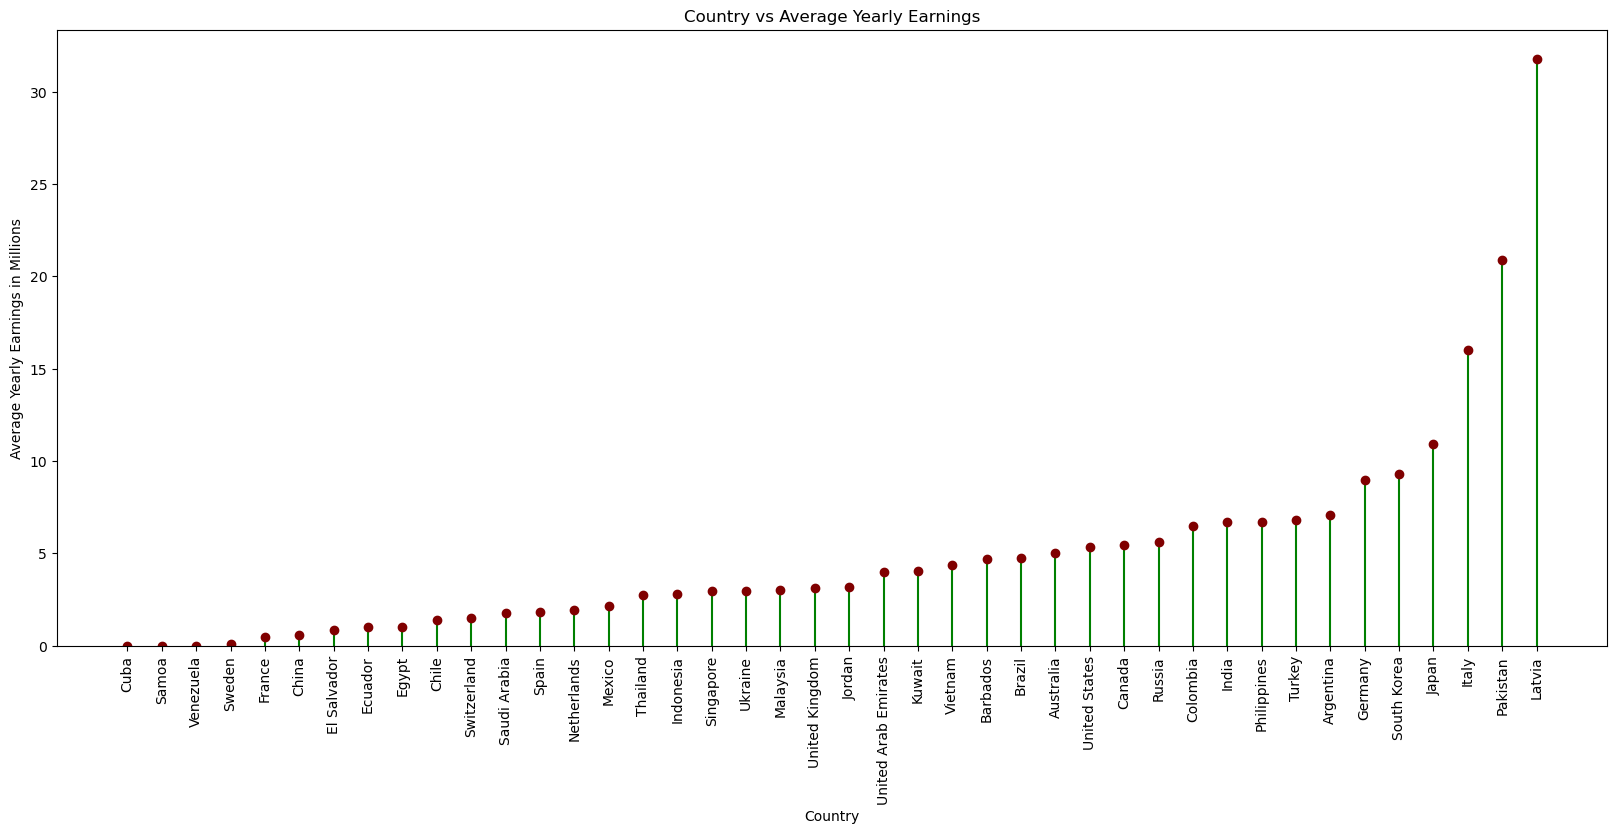

In [32]:
fig, ax = plt.subplots(figsize=(20, 8))

country_avg_earnings = df.groupby('Country')['average_yearly_earnings'].mean().sort_values(ascending=True)

x = country_avg_earnings.index.tolist()
y = np.divide(country_avg_earnings.values.tolist(), 1000000)
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.set_ylim(0)
ax.plot(x, y, 'o', color='maroon')
ax.set_xticklabels(x, rotation=90)
ax.set_xlabel('Country')
ax.set_ylabel("Average Yearly Earnings in Millions")
ax.set_title("Country vs Average Yearly Earnings")
plt.show()

YouTube channel published in <mark><b>Latvia</b></mark> has the highest yearly average earnings. 

<a id="3.4"></a>
##  <div style="text-align: left; background-color: #F75D59; font-family: Times New Roman; color: white; padding: 6px; line-height: 1;border-radius:10px">3.4. Top 3 Most Earning Countries in Each Category </div>

In [33]:
cat_lst = df['category'].unique().tolist()
def extract_top3_countries(df):
    frames = []
    for cat in cat_lst: 
        cat_df = df.loc[df['category'] == cat]
        top3_country = cat_df.groupby('Country')['average_yearly_earnings'].mean()[:3].index.tolist()
        cat_df = cat_df.loc[df['Country'].isin(top3_country)]
        frames.append(cat_df)
    new_df = pd.concat(frames)
    return new_df

In [34]:
country_cat_df = extract_top3_countries(df)
fig = px.treemap(country_cat_df, path=['category', 'Country'], color='Country', color_discrete_sequence=px.colors.qualitative.Bold)
fig.update_layout(
    title_text='Top 3 Most Earning Countries in Respective Category')
fig.show()

From the treemap, we can easily see that YouTube Channels published in <mark><b>India and Brazil</b></mark> have high earnings in each cateogry. 

In [58]:

# Filter out rows with missing category and relevant metrics
filtered_df = df.dropna(subset=['category', 'subscribers', 'video views', 'highest_monthly_earnings'])

category_metrics = filtered_df.groupby('category').agg({
    'subscribers': 'mean',
    'video views': 'mean',
    'highest_monthly_earnings': 'mean',
    'video_views_for_the_last_30_days': 'mean',
    'subscribers_for_last_30_days': 'mean'
}).reset_index()

# Rank categories based on metrics of interest
category_metrics['rank_score'] = (
    category_metrics['subscribers'] * 0.4 + 
    category_metrics['video views'] * 0.3 +
    category_metrics['highest_monthly_earnings'] * 0.3
)

# Sort categories by rank score in descending order
recommended_categories = category_metrics.sort_values(by='rank_score', ascending=False)['category'].tolist()

print("Recommended categories based on growth potential:")
for i, category in enumerate(recommended_categories[:5]):
    print(f"{i+1}. {category}")

# Optionally, you can visualize the data using matplotlib or seaborn for further insights


Recommended categories based on growth potential:
1. Shows
2. Education
3. Music
4. Trailers
5. Sports


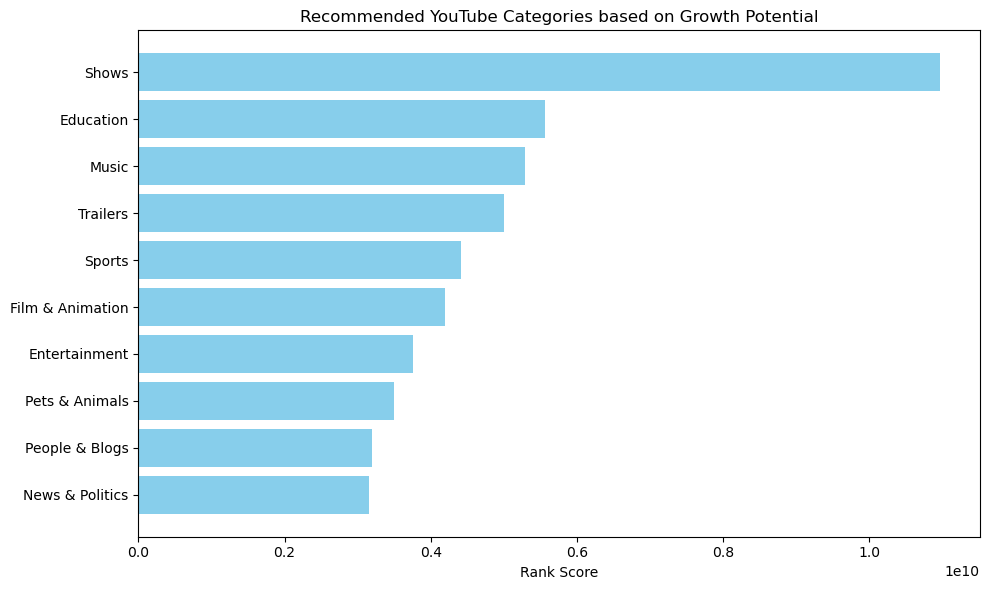

In [60]:

recommended_categories = category_metrics.sort_values(by='rank_score', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(recommended_categories['category'], recommended_categories['rank_score'], color='skyblue')
plt.xlabel('Rank Score')
plt.title('Recommended YouTube Categories based on Growth Potential')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rank at the top
plt.tight_layout()
plt.show()
